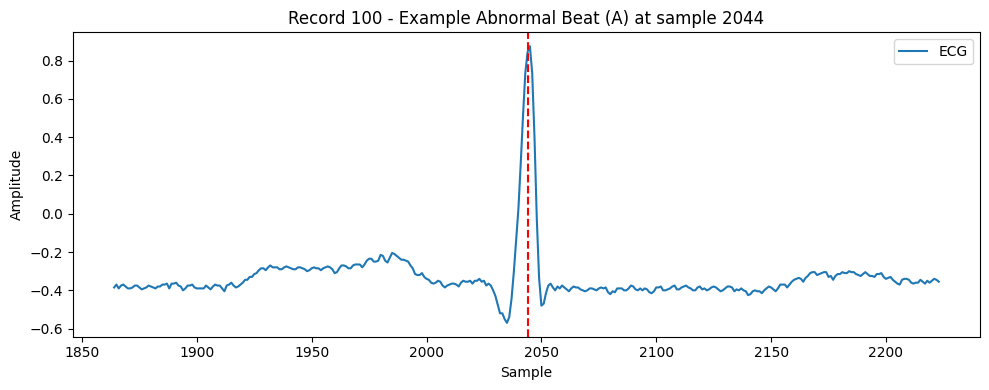

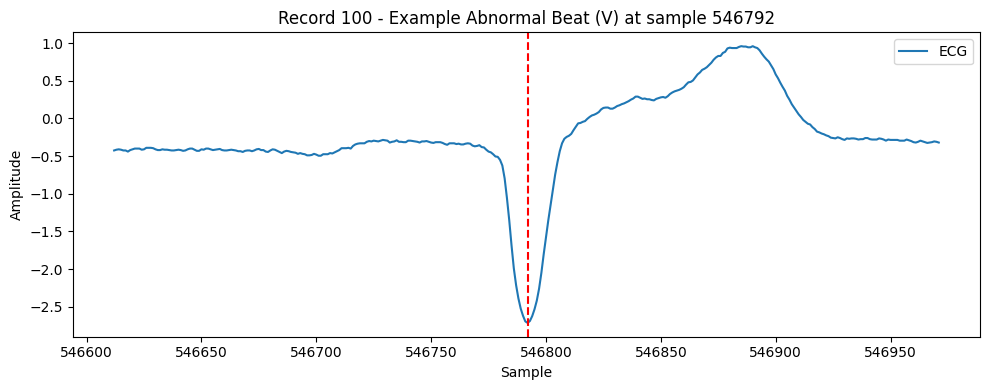

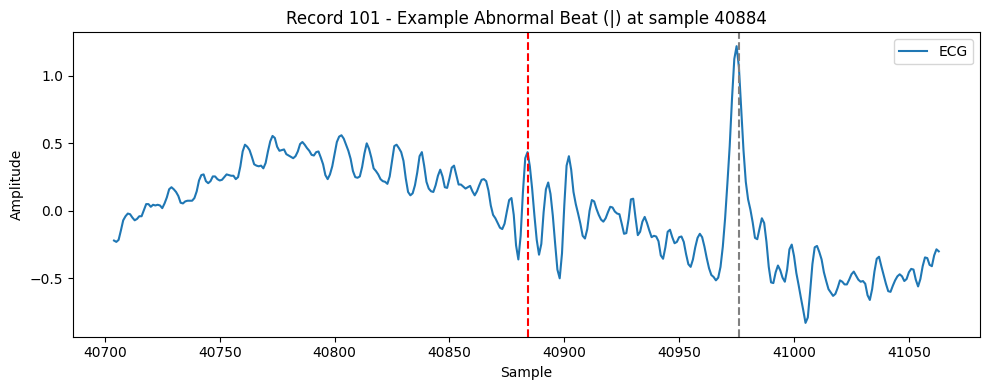

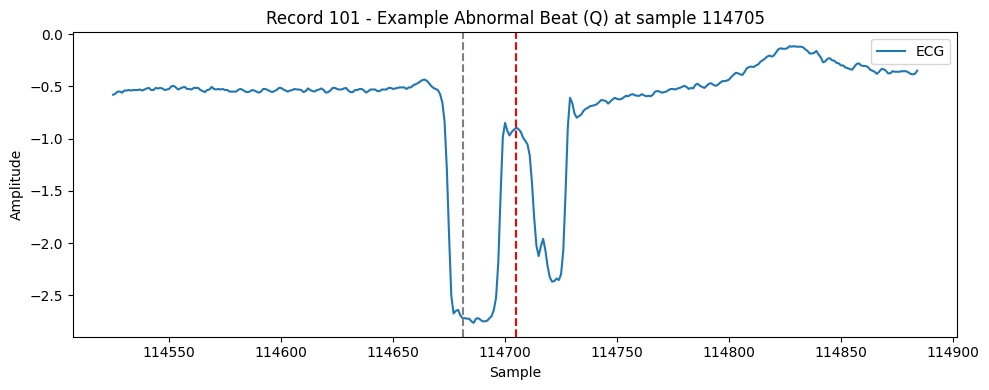

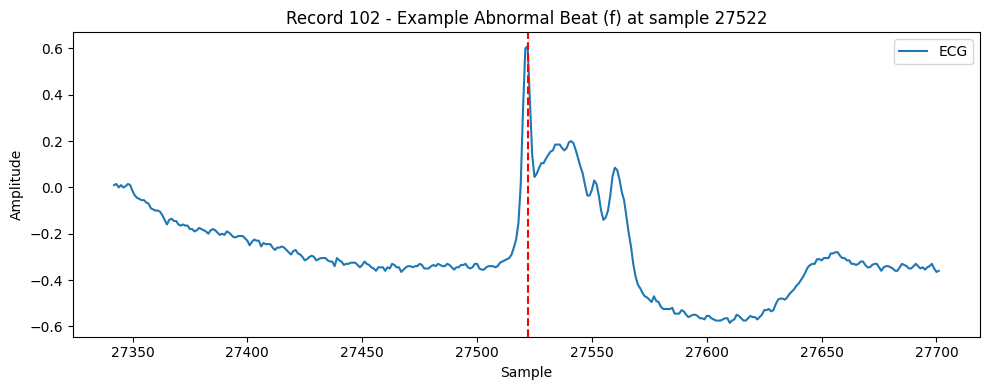

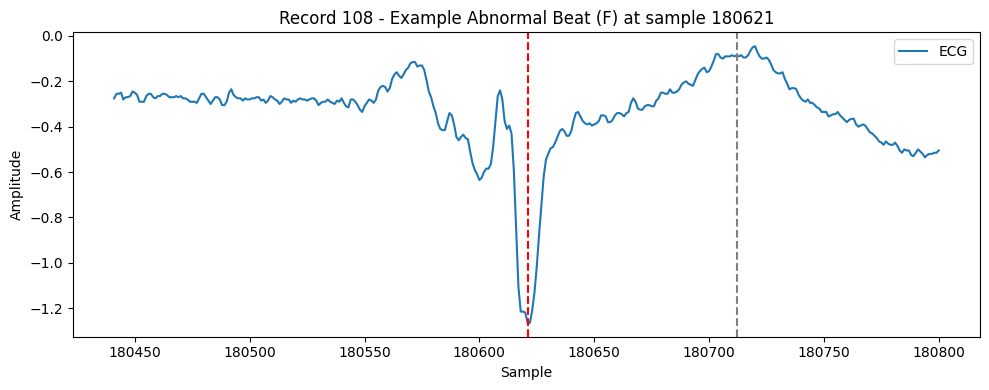

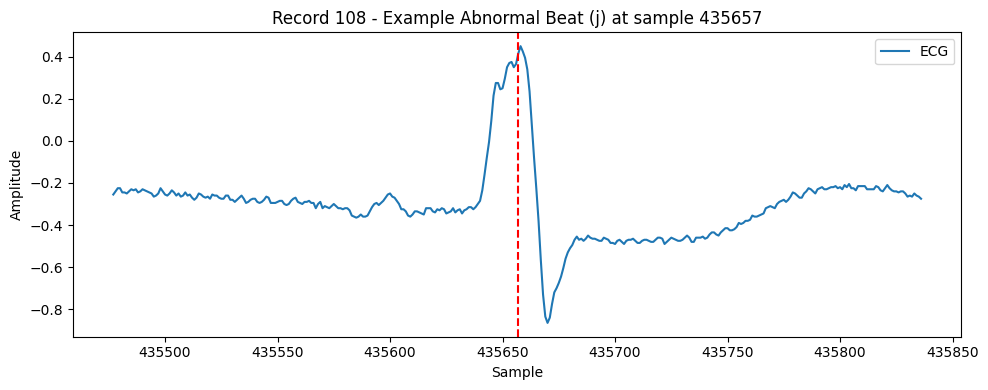

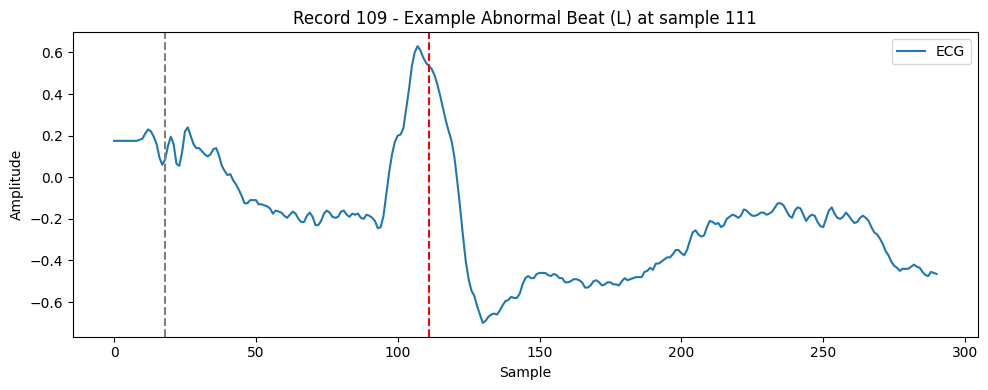

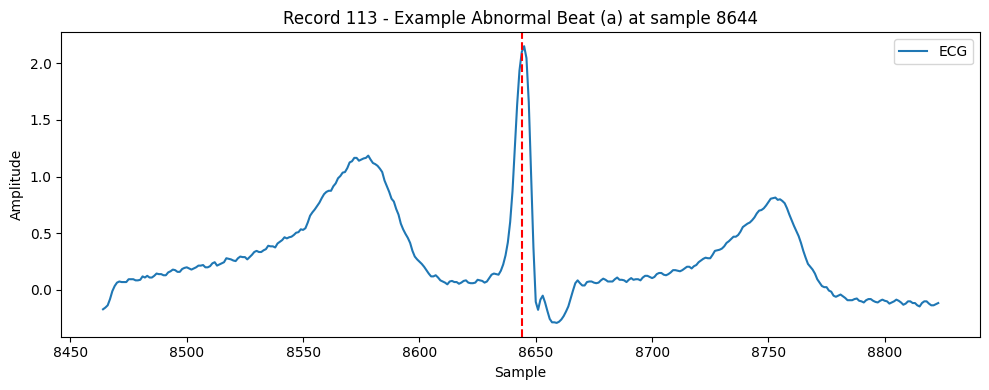

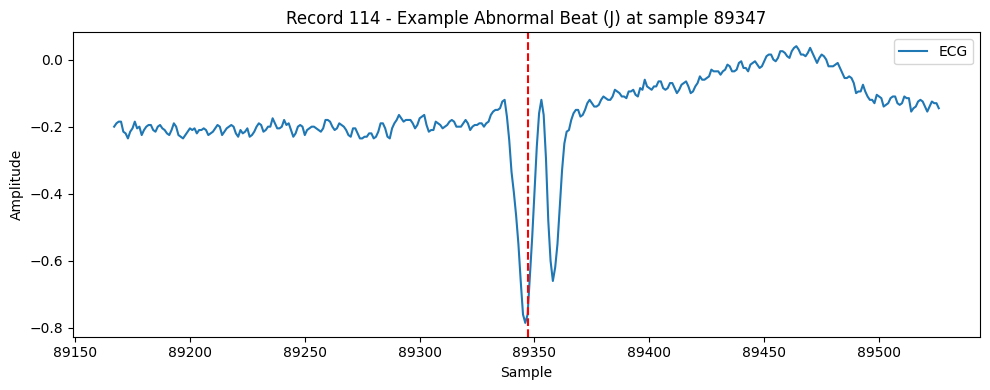

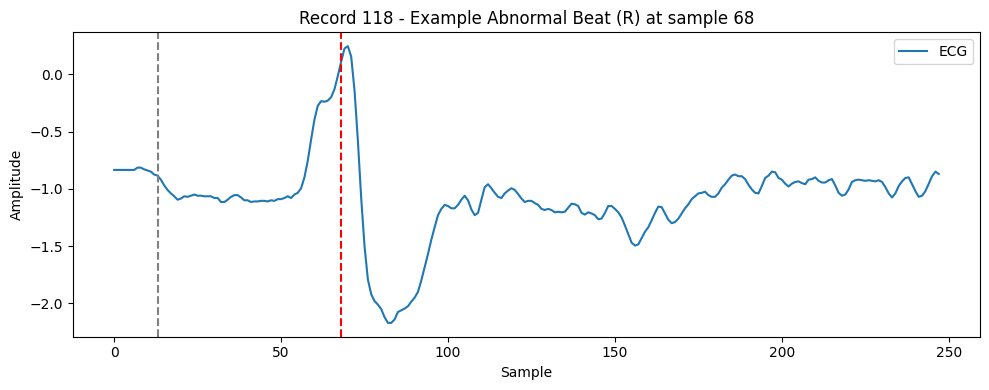

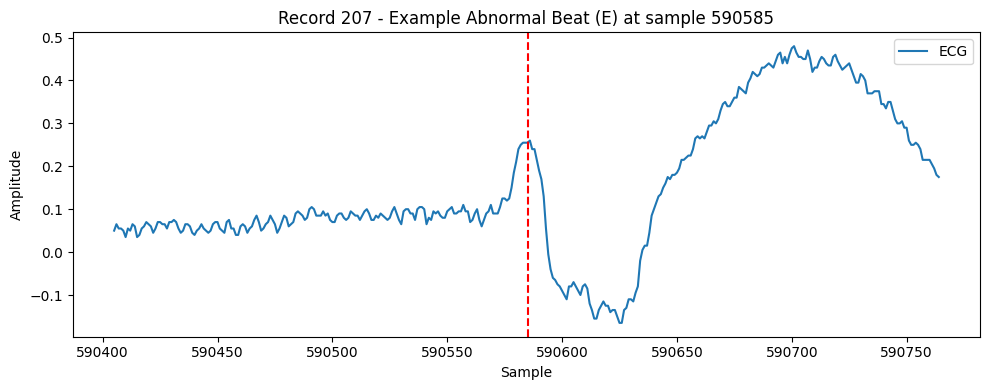

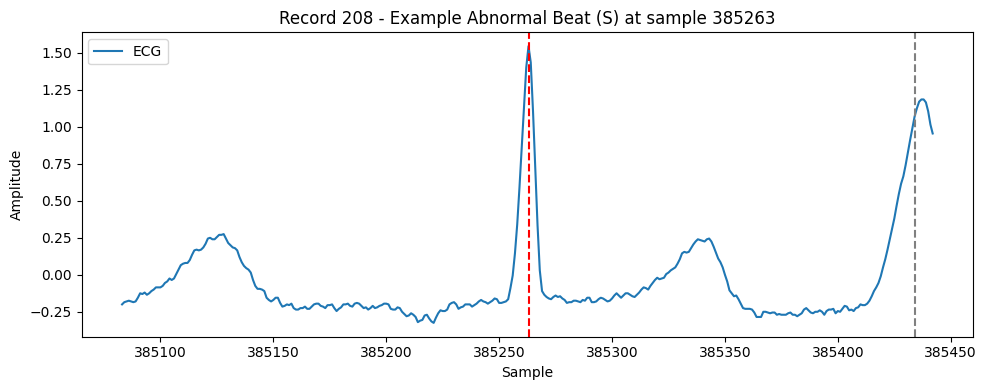

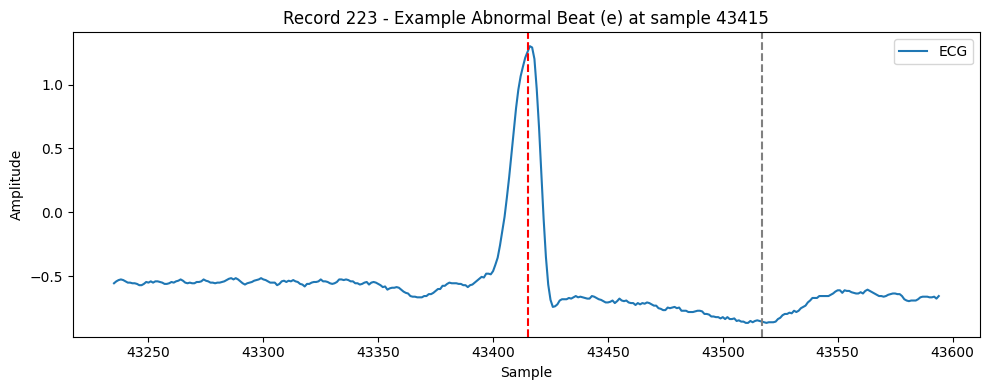

In [ ]:
import wfdb
import os
import matplotlib.pyplot as plt

base_path = '/Users/matthewcapstick/Documents/Malignant Ventricular Ectopy/mit-bih-arrhythmia-database-1.0.0'
abnormal_symbols = ['L', 'R', 'A', 'V', 'F', 'J', 'S', 'E', 'e', 'j', 'a', 'f', 'Q', '|']

# Dictionary to store first occurrence: {symbol: (record_id, sample_index)}
first_occurrences = {}

# Find first occurrence of each abnormal symbol
for rec in sorted(os.listdir(base_path)):
    if rec.endswith('.dat'):
        rec_id = rec.split('.')[0]
        try:
            ann = wfdb.rdann(os.path.join(base_path, rec_id), 'atr')
            for idx, sym in enumerate(ann.symbol):
                if sym in abnormal_symbols and sym not in first_occurrences:
                    first_occurrences[sym] = (rec_id, ann.sample[idx])
                if len(first_occurrences) == len(abnormal_symbols):
                    break
        except Exception:
            continue
    if len(first_occurrences) == len(abnormal_symbols):
        break

# Plot each abnormality
window = 360  # 1 second window (adjust as needed)
for sym, (record_id, sample_index) in first_occurrences.items():
    data = f'{base_path}/{record_id}'
    record = wfdb.rdrecord(data, sampto=sample_index+window)
    annotation = wfdb.rdann(data, 'atr', sampto=sample_index+window)
    signal = record.p_signal[:, 0]
    start = max(sample_index - window//2, 0)
    end = min(sample_index + window//2, len(signal))

    plt.figure(figsize=(10, 4))
    plt.plot(range(start, end), signal[start:end], label='ECG')
    # Overlay annotation
    for s, s_sym in zip(annotation.sample, annotation.symbol):
        if start <= s < end:
            color = 'red' if s_sym == sym else 'gray'
            plt.axvline(s, color=color, linestyle='--')
            # plt.text(s, signal[s], s_sym, color=color, fontsize=12, ha='center', va='bottom')
    plt.title(f"Record {record_id} - Example Abnormal Beat ({sym}) at sample {sample_index}")
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.tight_layout()
    plt.show()